<a href="https://www.kaggle.com/code/vanpatangan/most-sold-books-in-the-world-eda?scriptVersionId=196538380" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading Dataframe
df = pd.read_csv('/kaggle/input/most-sold-books-in-the-world/Books.csv')

In [2]:
def check(df):
    """
    Generates a concise summary of DataFrame columns.
    """
    # Use list comprehension to iterate over each column
    summary = [
        [col, df[col].dtype, df[col].count(), df[col].nunique(), df[col].isnull().sum(), df.duplicated().sum()]
        for col in df.columns
    ]

    # Create a DataFrame from the list of lists
    df_check = pd.DataFrame(summary, columns=["column", "dtype", "instances", "unique", "sum_null", "duplicates"])

    return df_check



In [3]:
# Data summary 
check(df)

,column,dtype,instances,unique,sum_null,duplicates
0,Book,object,264,170,0,94
1,Author(s),object,264,153,0,94
2,Original language,object,264,16,0,94
3,First published,object,264,98,0,94
4,Approximate sales,object,264,166,0,94
5,Genre,object,264,74,0,94


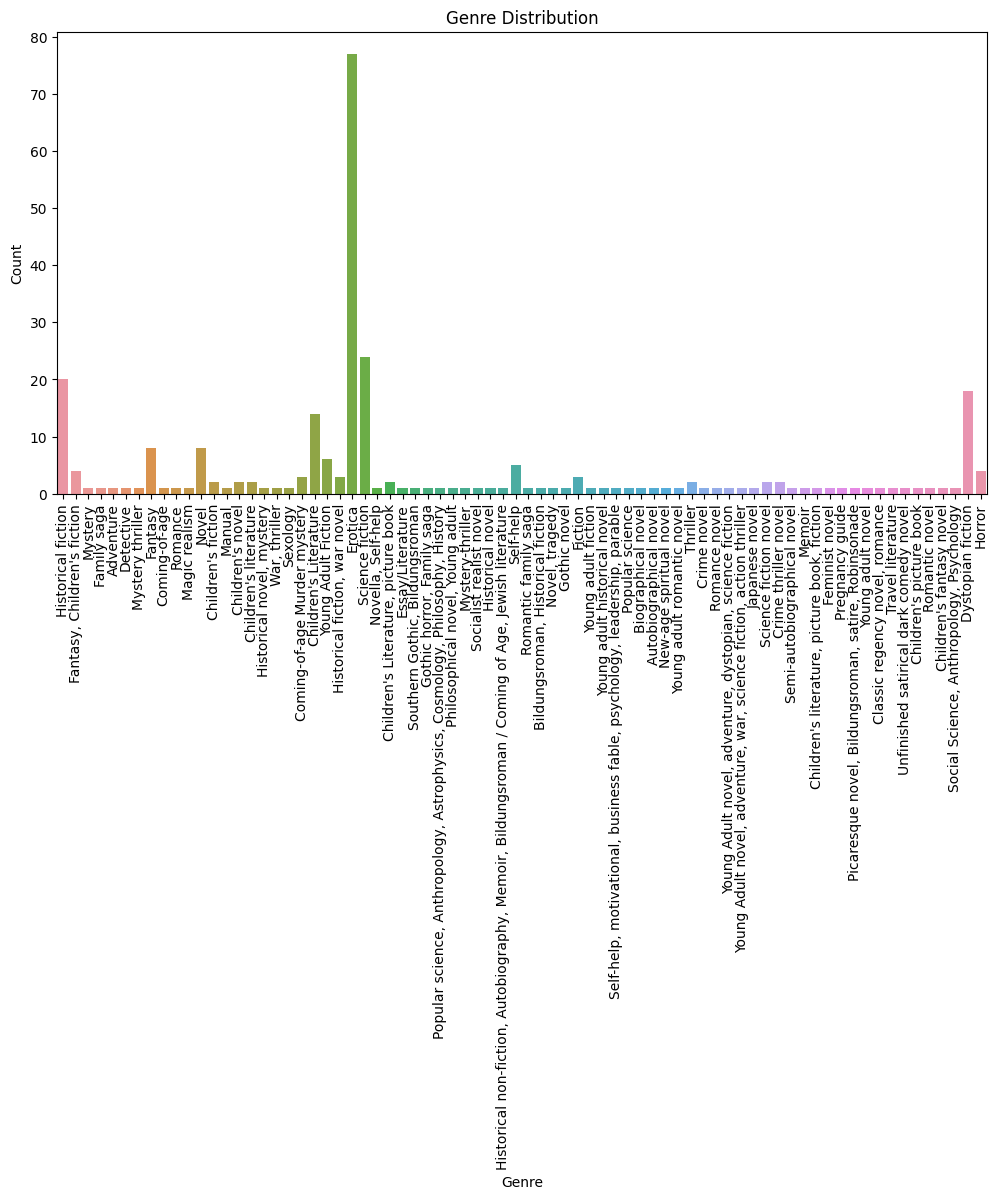

In [4]:
# Bar Chart for genre distribution

plt.figure(figsize=(12, 6))
sns.countplot(x='Genre', data=df)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation ='vertical')
plt.show()

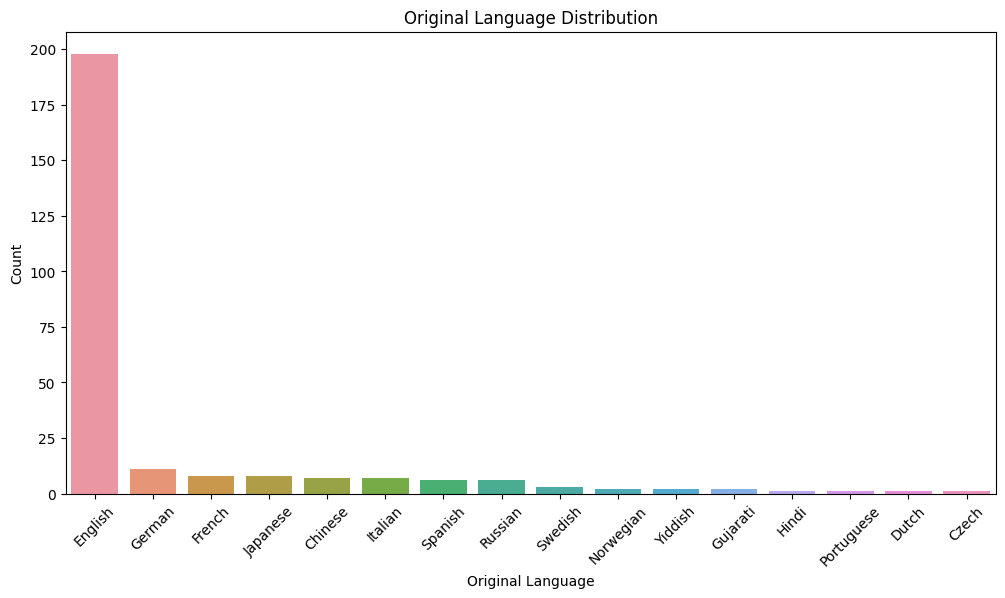

In [5]:
# Chart for original language distribution 

plt.figure(figsize=(12, 6))
sns.countplot(x='Original language', data=df, order=df['Original language'].value_counts().index)
plt.title('Original Language Distribution')
plt.xlabel('Original Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


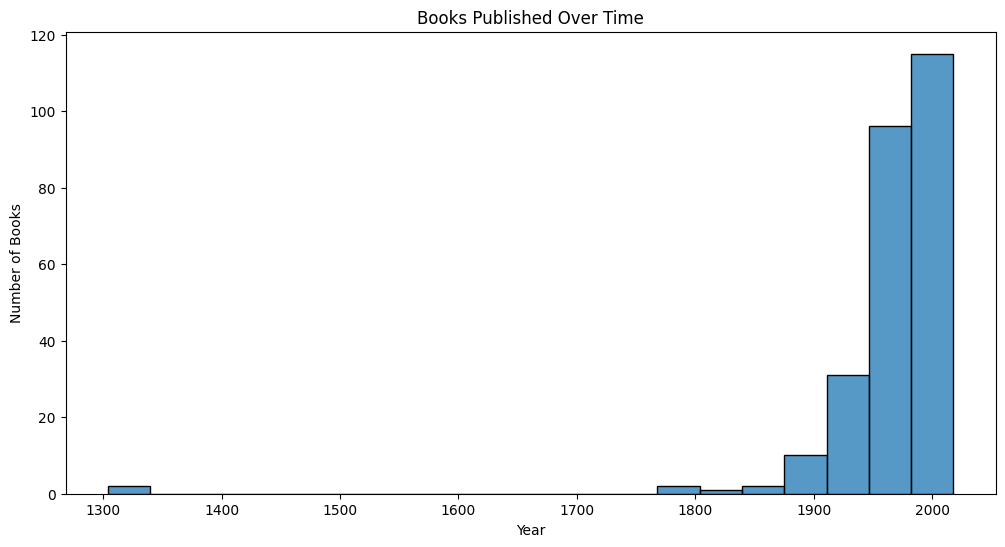

In [6]:
# Yearly Book Publication Trend

df['First published'] = pd.to_numeric(df['First published'], errors='coerce')
plt.figure(figsize=(12, 6))
sns.histplot(df['First published'].dropna(), bins=20)
plt.title('Books Published Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.show()

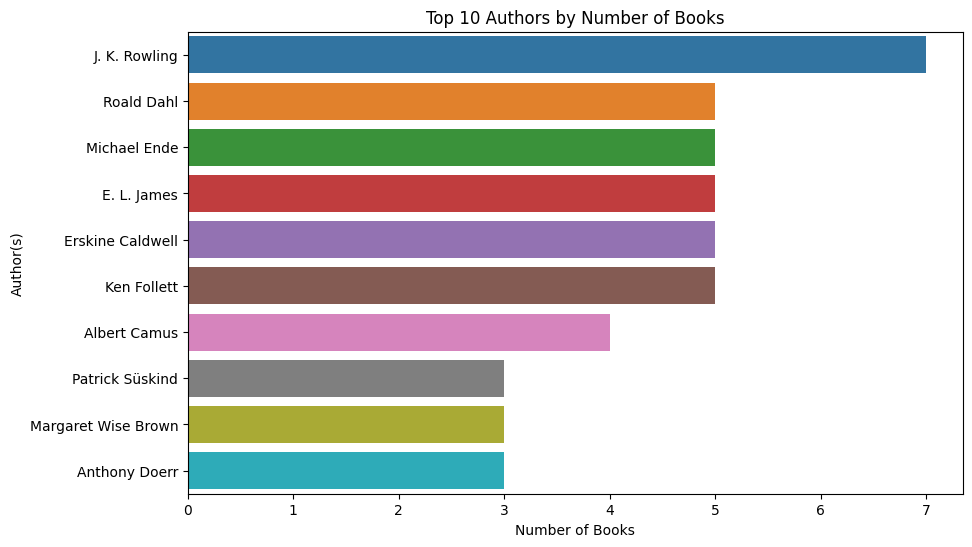

In [7]:
#Top Authors by Number of Books

plt.figure(figsize=(10, 6))
top_authors = df['Author(s)'].value_counts().head(10)
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title('Top 10 Authors by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Author(s)')
plt.show()

In [8]:
import re

# Function to clean sales data
def clean_sales(sales_str):
    # Remove anything in square brackets and non-numeric characters (except for '>' or numbers)
    sales_str = re.sub(r'\[.*?\]', '', sales_str)  # Remove annotations like [20][circular reporting]
    sales_str = re.sub(r'[^\d>]', '', sales_str)   # Keep only numbers and the '>'
    
    # Handle ranges or greater than values
    if '>' in sales_str:
        sales_str = sales_str.replace('>', '')  # Keep the value, drop the '>'
    
    try:
        return float(sales_str)
    except ValueError:
        return None  # Return None for rows that still can't be converted

# Apply the cleaning function
df['Approximate sales'] = df['Approximate sales'].apply(clean_sales)

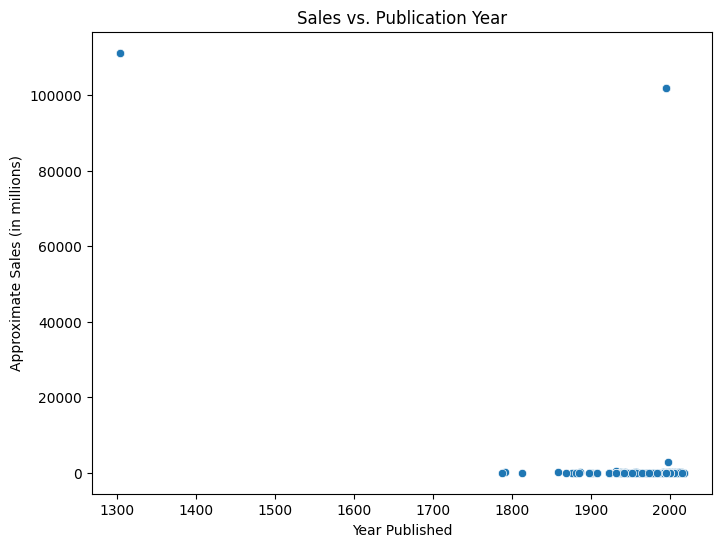

In [9]:
# Ensure 'First published' is numeric
df['First published'] = pd.to_numeric(df['First published'], errors='coerce')

# Drop rows with missing data
df = df.dropna(subset=['First published', 'Approximate sales'])

# Create bins for publication years (e.g., decades)
bins = [1800, 1900, 1950, 2000, 2023]  # Adjust bins according to your dataset
labels = ['1800-1900', '1900-1950', '1950-2000', '2000-2023']
df['Publication period'] = pd.cut(df['First published'], bins=bins, labels=labels)

# Sum the sales for each period
sales_by_period = df.groupby('Publication period')['Approximate sales'].sum()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='First published', y='Approximate sales', data=df)
plt.title('Sales vs. Publication Year')
plt.xlabel('Year Published')
plt.ylabel('Approximate Sales (in millions)')
plt.show()